In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../Student_Performance.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


## Visualization of In-dependent with dependent variable

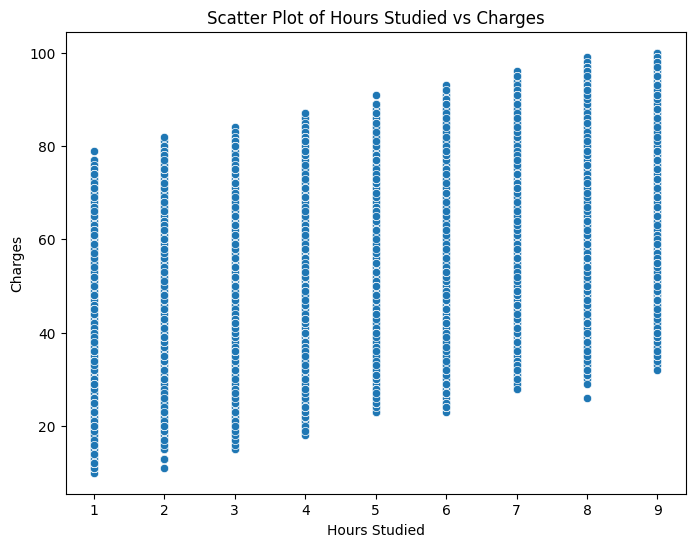

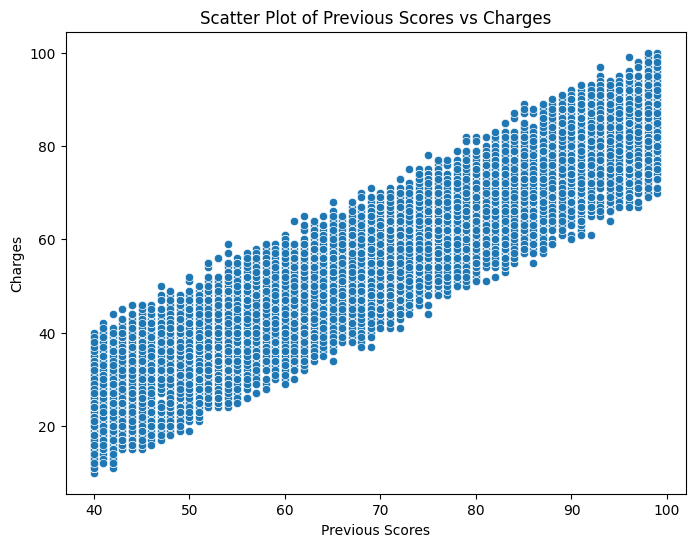

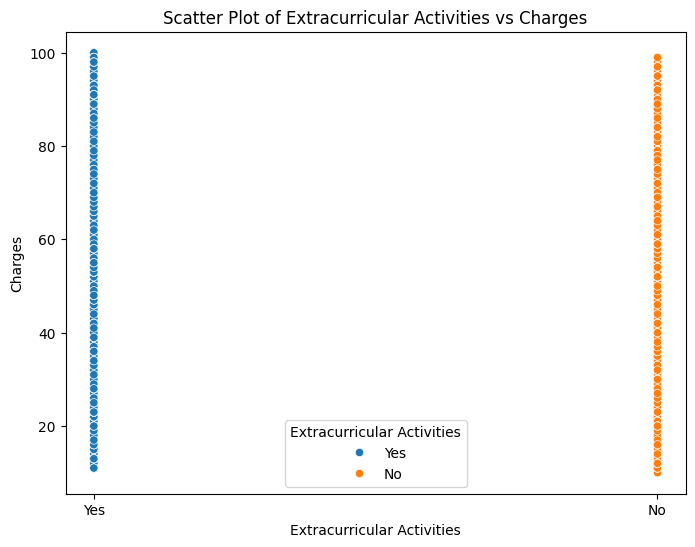

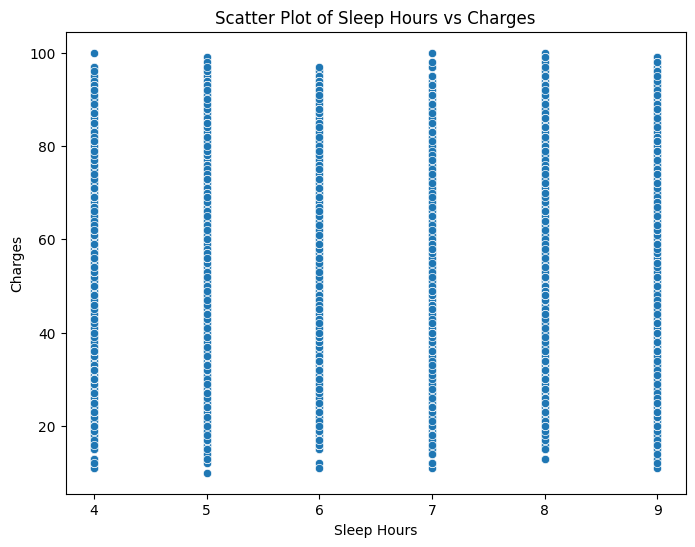

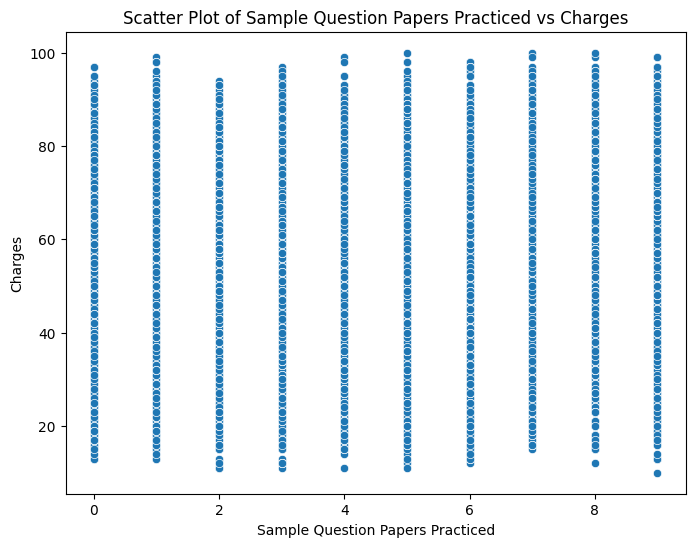

In [4]:
for var in X.columns.tolist():
    plt.figure(figsize=(8, 6))
    if X[var].dtype == 'object':  # Check if the variable is categorical
        sns.scatterplot(x=var, y=Y, data=df, hue=var)
    else:
        sns.scatterplot(x=X[var], y=Y)
    plt.title(f'Scatter Plot of {var} vs Charges')
    plt.xlabel(var)
    plt.ylabel('Charges')
    plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 2] = label_encoder.fit_transform(X.iloc[:, 2])
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regresor=LinearRegression()
regresor.fit(X_train,Y_train)
Y_pred=regresor.predict(X_test)

In [8]:
print(Y_test.shape, Y_pred.shape)


(2000,) (2000,)


# Accuracy Check

In [9]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)

0.9880686410711422
